In [86]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [87]:
sns.set()
data = pd.read_csv("clustering.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "Unnamed: 0"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data

,cluster,f1,grad,sol,error,1,2,3,4,5,6
0,None,200,600,"[2.808656126220426, 4.660962727729024, 2.36361...",5.282644,202.873614,811.116425,1446.085176,2005.786123,2617.046922,3086.584756
1,3,200,600,"[8.533684487474305, 13.103763473101656, 8.5336...",51.107041,157.264180,581.621064,1286.834889,1341.873164,2334.032609,2798.547229
2,4,200,600,"[7.864331967111546, 14.474176814270365, 7.8643...",23.481659,188.530031,797.686099,1476.931117,2405.619462,2717.529524,3440.462753
3,5,200,600,"[8.887309542078757, 14.474176814270365, 7.4728...",19.480904,197.176981,708.511975,1325.823247,2184.088335,2845.620952,2986.072490
4,6,200,600,"[8.887309542078757, 13.232343013050961, 7.4728...",21.128549,186.394426,699.848823,1284.923907,1950.164426,2715.106363,2808.026369
5,7,200,600,"[8.36437797833203, 13.232343013050961, 7.32490...",20.255336,198.618036,811.643710,1447.723614,2051.724515,3112.035112,3160.367160
6,8,200,600,"[8.36437797833203, 13.914038083177129, 7.32490...",20.473004,202.580549,814.303789,1481.249506,2156.637570,3063.073227,3154.198016
7,9,200,600,"[8.36437797833203, 13.914038083177129, 7.32490...",17.383496,194.573997,807.881057,1436.471805,1991.692963,3036.660048,3129.624031
8,10,200,600,"[8.295871870069826, 13.914038083177129, 7.3249...",10.142986,205.870472,785.121997,1502.442641,2015.631850,2757.376269,3196.261612
9,15,200,600,"[8.449261291415576, 13.914038083177129, 7.1222...",5.852492,197.692479,804.899435,1426.774400,1943.105877,2643.322130,3064.162963


In [88]:
data_clean = pd.concat([data["cluster"], data["error"]], axis=1)
data_clean = data_clean.iloc[1:-1]
data_clean

,cluster,error
1,3,51.107041
2,4,23.481659
3,5,19.480904
4,6,21.128549
5,7,20.255336
6,8,20.473004
7,9,17.383496
8,10,10.142986
9,15,5.852492
10,20,4.714172


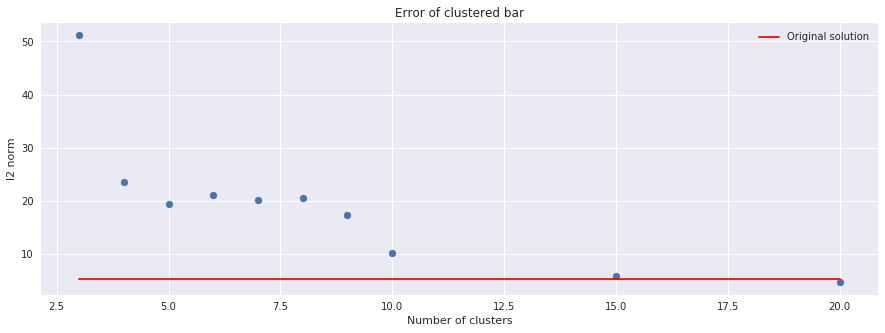

In [129]:
fig = plt.figure(figsize=(15, 5))
plt.scatter(x=[float(x) for x in data_clean["cluster"]], y=data_clean["error"])
plt.title("Error of clustered bar")
plt.ylabel("l2 norm")
plt.xlabel("Number of clusters")
plt.plot(range(3,21), [5.282644]*18, c="red")
plt.legend(["Original solution"])
plt.show()


### Log_10(E/p) for each solution

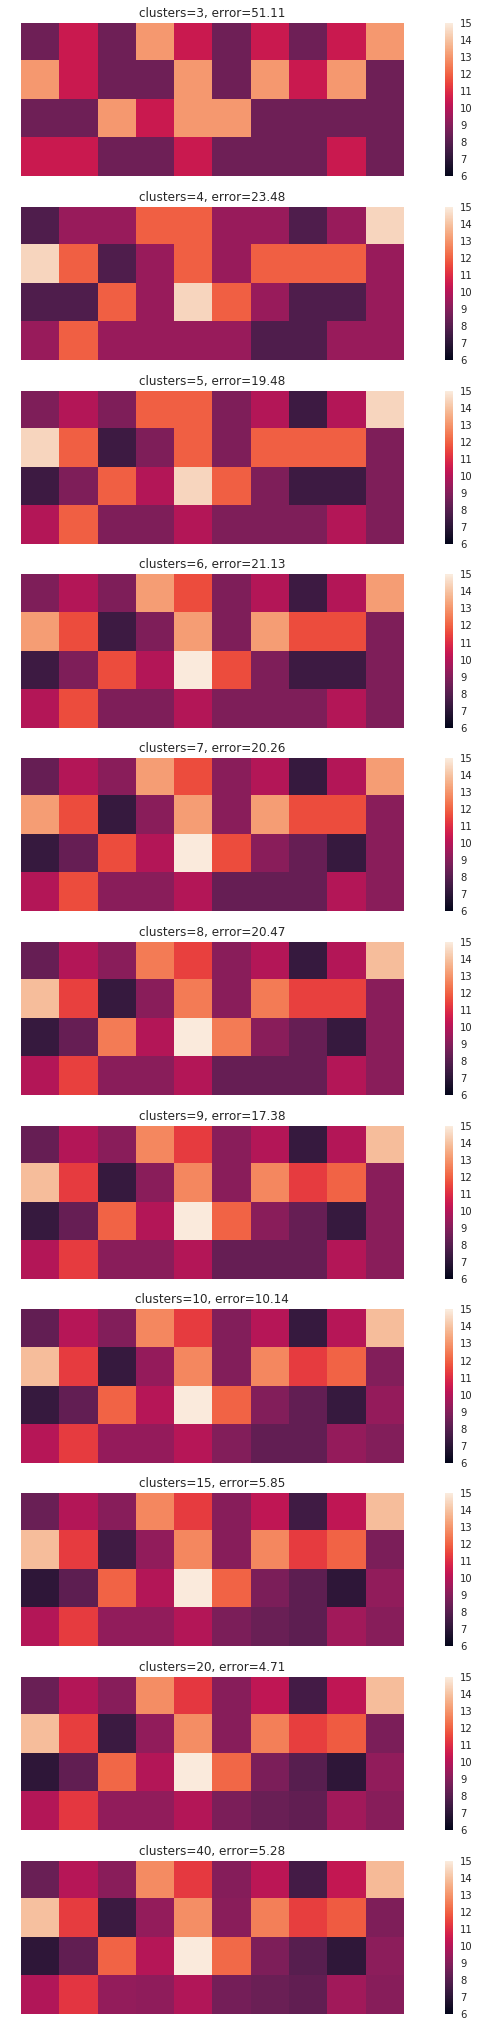

In [139]:
dataS = data.drop(["f1", "grad", 1, 2, 3, 4, 5, 6], axis=1)
dataS['sol'] = [x[1:-1] for x in data['sol']]
dataS = dataS.join(dataS['sol'].str.split(', ', expand=True).apply(pd.to_numeric))

dataL = dataS.drop(["sol", "cluster", "error"], axis=1)

fig = plt.figure(figsize=(15, 40))

for i in range(1, 12):
    fig.add_subplot(12, 1, i+1)
    plt.imshow([dataL.iloc[i][x:40:4] for x in range(4)], vmin=6, vmax=15)
    plt.axis("off")
    plt.title("clusters={}, error={:.2f}".format(dataS.iloc[i]["cluster"], dataS.iloc[i]["error"]))
    plt.colorbar()

plt.show()